In [26]:
import torch
import torch.nn as nn
import torch.autograd as autograd

from modules.pinn import *

import matplotlib.pyplot as plt
import pandas as pd


In [27]:
def make_tensor(x):
    return torch.tensor(x).unsqueeze(0).T.type(torch.FloatTensor).cuda()

<All keys matched successfully>

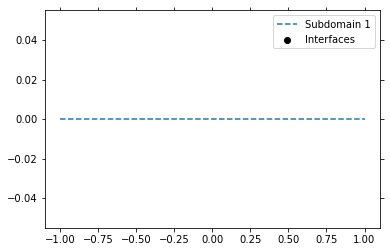

In [28]:
fpath = './models/1d_sur_prob3.data'
state_dict = torch.load(fpath)

# points = [-1.0,-0.5, 0.0, 0.5, 1.0]
# points = [-1.0, 0.0, 0.5,1.0]
points = [-1.0, 1.0]
domain_no = len(points) - 1
global_lb = -1.0
global_rb = 1.0

figure_path = "./figures/"

model = CPINN_surrogate(domain_no, global_lb, global_rb, figure_path)

sample = {'Model{}'.format(i+1): PINN_surrogate(i).cuda() for i in range(domain_no)}
# points = [-1.0, 0.0, 1.0]
model.module_update(sample)
model.make_domains(points)
model.make_boundaries(points)
model.plot_domains()

model.load_state_dict(state_dict)

In [63]:
plots = np.arange(-0.99, 1.01, 0.02)
points_tensor = make_tensor(plots)
e = make_tensor(np.ones(plots.shape) * 0.8)

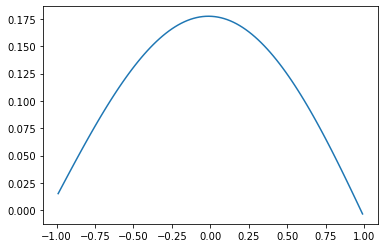

In [64]:
output = model(points_tensor, e).detach().cpu().numpy()
plt.plot(plots, output)